# Sentiment analysis with the perceptron algorithm

### Importing the necessary packages

In [66]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/perceptron_algorithm

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 358, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 358 (delta 59), reused 3 (delta 1), pack-reused 252 (from 1)
Receiving objects: 100% (358/358), 42.64 MiB | 19.32 MiB/s, done.
Resolving deltas: 100% (182/182), done.
/content/machine_learning_1/perceptron_algorithm/machine_learning_1/perceptron_algorithm


In [125]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [126]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])
# weights = [1.0 for i in range(len(features[0]))]
# bias=0
# weights+0.01*(label-features@weights+bias)@features
# weights+learning_rate*(label-features@weights+bias)@features

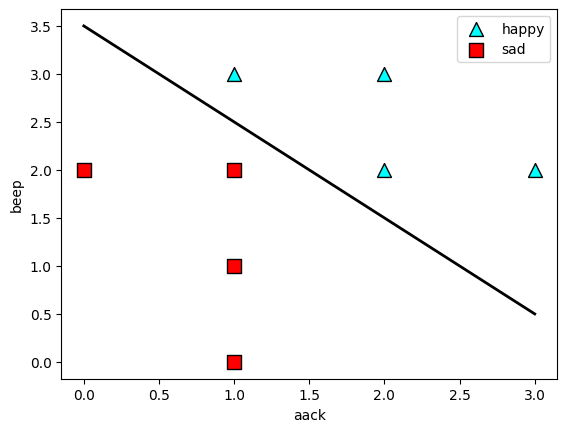

In [127]:
# Plotting the points
utils.plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
utils.draw_line(1,1,-3.5)

### Coding the perceptron trick

In [185]:
def step(x):
    # print('xxx')
    # print(x)
    ## TODO ##
    # implement step function
    output=1 if x>=0 else 0

    return output

def score(weights, bias, features):
    ## TODO ##
    # print(weights)
    # print(features)
    # print(bias)
    output=weights@features+bias
    # print('oitupt')
    # print(output)
    # implement score calculation

    return output

def prediction(weights, bias, features):
    ## TODO ##

    output=step(score(weights, bias, features))


    # implement prediction calculation using step and score functions

    return output

def error(weights, bias, features, label):
    ## TODO ##
    # implement error calculation using prediction and score functions
    if label!=prediction(weights, bias, features):
      output=abs(score(weights, bias, features))
    else:
      output=0
    return output

def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [186]:
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    ## TODO ##
    # update the weights and bias using a single data sample
    # print('btrates')
    # print(weights)
    # print(label)
    # print(features)
    # label=label.reshape(-1,1)
    # print(weights)
    weights_1=weights+learning_rate*(label-prediction(weights, bias, features))*features
    # print('aslfjasg')
    bias=bias+learning_rate*(label-prediction(weights, bias, features))
    return weights_1, bias

### Running the perceptron algorithm

In [187]:
random.seed(0)

def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    ## TODO ##
    for i in range(epochs):
      lst=[i for i in range(len(features)-1)]
      indexx=random.choice(lst)

      X_random=features[indexx]
      y_random=labels[indexx]
      # print('asfasg')
      # print(X_random)
      # weights=np.array(weights).reshape(-1,1)
      weights, bias=perceptron_trick(weights,bias,X_random,y_random)
      # for this number of epochs

      errors.append(mean_perceptron_error(weights, bias, features, labels))
    # get a random datasample of our dataset(x,y)
    # using the selected datasample use perceptron_trick update weights and bias

    utils.draw_line(weights[0], weights[1], bias)
    utils.plot_points(features, labels)
    plt.ylim([-2, 5])
    plt.show()
    print(errors)
    plt.scatter(range(epochs), errors)
    return weights, bias

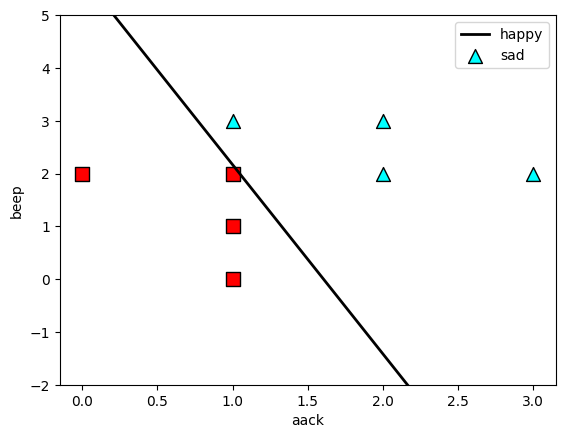

[1.0, 0.97875, 0.97875, 0.9574999999999999, 0.94875, 0.9337499999999999, 0.9337499999999999, 0.9125, 0.8912499999999999, 0.8912499999999999, 0.8912499999999999, 0.87625, 0.8549999999999999, 0.8399999999999999, 0.8399999999999999, 0.8224999999999998, 0.8224999999999998, 0.8049999999999999, 0.7899999999999998, 0.7725, 0.7725, 0.7637499999999998, 0.7637499999999998, 0.7637499999999998, 0.7487499999999999, 0.7487499999999999, 0.7487499999999999, 0.7487499999999999, 0.7487499999999999, 0.7312499999999998, 0.7162499999999998, 0.7074999999999998, 0.7074999999999998, 0.6987499999999998, 0.6987499999999998, 0.6987499999999998, 0.6837499999999999, 0.6624999999999998, 0.6624999999999998, 0.6537499999999998, 0.6387499999999997, 0.6174999999999997, 0.6024999999999997, 0.6024999999999997, 0.6024999999999997, 0.5849999999999997, 0.5849999999999997, 0.5637499999999998, 0.5424999999999998, 0.5424999999999998, 0.5424999999999998, 0.5274999999999996, 0.5187499999999996, 0.5187499999999996, 0.518749999999

(array([0.43, 0.12]), -0.6900000000000004)

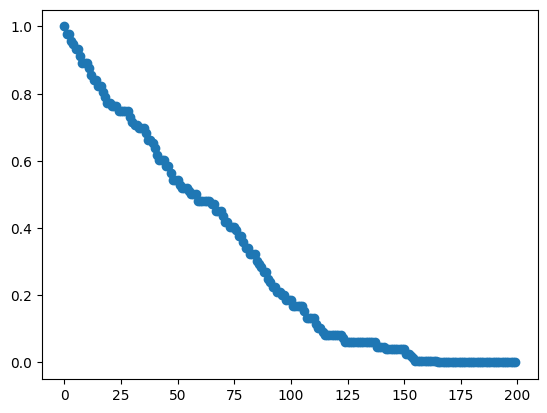

In [188]:
perceptron_algorithm(features, labels)

### The perceptron algorithm using SKlearn

In [74]:
from sklearn.linear_model import SGDClassifier
## TODO ##
model=SGDClassifier(loss='perceptron')
# choose loss to be "perceptron" and tol = None
clf=model.fit(features,labels)

In [75]:
clf.score(features, labels)

1.0

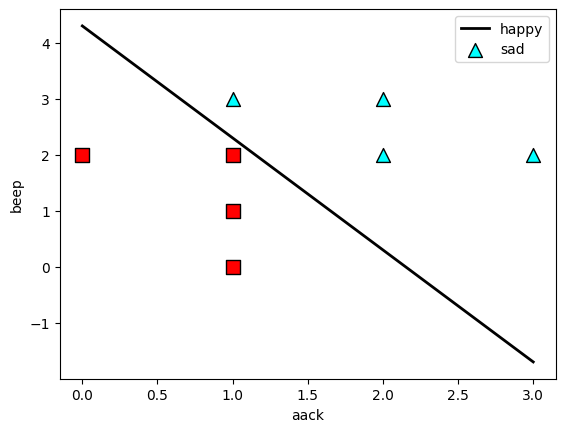

In [76]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()